<a href="https://colab.research.google.com/github/Kaiziferr/Deep_Learning_Workshop/blob/master/RNN/01_series_tiempo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [2]:
def create_dataset(data, loock_back = 1):
  dataX, dataY = [], []
  for i in range(len(data) - loock_back-1):
    a = data[i: (i+loock_back), 0]
    dataX.append(a)
    dataY.append(data[i+loock_back, 0])
  return np.array(dataX), np.array(dataY)

In [3]:
data = pd.read_csv('./data/international-airline-passengers.csv', usecols=[1], engine='python')
data_values = data.values.astype('float32')

In [4]:
#Normalization de datos
scaler = MinMaxScaler(feature_range=(0,1))
data_values = scaler.fit_transform(data_values)

In [5]:
#train and test
train_size = int(len(data_values)*0.67)
test_set = len(data_values) - train_size
train, test = data_values[0:train_size, :], data_values[train_size:, :]
display(len(data_values), len(train), len(test) )

144

96

48

In [6]:
loock_back = 1
trainX, trainY = create_dataset(train, loock_back)
testX, testY = create_dataset(test, loock_back)
for i in range(5):
  print(trainX[i], trainY[i])

[0.01544401] 0.027027026
[0.02702703] 0.05405405
[0.05405405] 0.04826255
[0.04826255] 0.032818526
[0.03281853] 0.059845567


In [7]:
# La red LSTM espera que los datos de entrada (X) se proporcionen con una estructura de matriz especifica en forma de [muestras, pasos de tiempo (ventana), caracteristicas]

#Los datos preparados tienen la forma: [muestras, carcteristicas]

#Muestra y caracteristicas
trainX.shape

(94, 1)

In [8]:
trainX = np.reshape(trainX, (trainX.shape[0],1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0],1, testX.shape[1]))

# Diseño de LSTM
- Capa visible con 1 entrada
- Capa oculta con 4 bloques LSTM o neuronas
- Capa de salida que hace una predicción de valor unico. LSTM utiliza por defecto la función sigmoidal
- 100 epocas y batch 1

In [9]:
model = Sequential()
model.add(LSTM(4, input_shape=(1, loock_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer = 'adam')
model.fit(trainX, trainY, epochs = 100, verbose = 2)

Epoch 1/100
3/3 - 16s - loss: 0.0449
Epoch 2/100
3/3 - 0s - loss: 0.0425
Epoch 3/100
3/3 - 0s - loss: 0.0404
Epoch 4/100
3/3 - 0s - loss: 0.0382
Epoch 5/100
3/3 - 0s - loss: 0.0361
Epoch 6/100
3/3 - 0s - loss: 0.0342
Epoch 7/100
3/3 - 0s - loss: 0.0323
Epoch 8/100
3/3 - 0s - loss: 0.0305
Epoch 9/100
3/3 - 0s - loss: 0.0288
Epoch 10/100
3/3 - 0s - loss: 0.0272
Epoch 11/100
3/3 - 0s - loss: 0.0256
Epoch 12/100
3/3 - 0s - loss: 0.0242
Epoch 13/100
3/3 - 0s - loss: 0.0229
Epoch 14/100
3/3 - 0s - loss: 0.0217
Epoch 15/100
3/3 - 0s - loss: 0.0204
Epoch 16/100
3/3 - 0s - loss: 0.0193
Epoch 17/100
3/3 - 0s - loss: 0.0183
Epoch 18/100
3/3 - 0s - loss: 0.0174
Epoch 19/100
3/3 - 0s - loss: 0.0166
Epoch 20/100
3/3 - 0s - loss: 0.0158
Epoch 21/100
3/3 - 0s - loss: 0.0151
Epoch 22/100
3/3 - 0s - loss: 0.0144
Epoch 23/100
3/3 - 0s - loss: 0.0139
Epoch 24/100
3/3 - 0s - loss: 0.0134
Epoch 25/100
3/3 - 0s - loss: 0.0129
Epoch 26/100
3/3 - 0s - loss: 0.0125
Epoch 27/100
3/3 - 0s - loss: 0.0121
Epoch 28/

In [10]:
#Resultados
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

In [11]:
#Invert prediction
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])

testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])


In [12]:
# Calcular el error
train_score = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Puntuación Entrenamiento: %.2f RMSE' % (train_score))

test_score = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Puntuación Test: %.2f RMSE' % (test_score))

Puntuación Entrenamiento: 40.14 RMSE
Puntuación Test: 117.00 RMSE


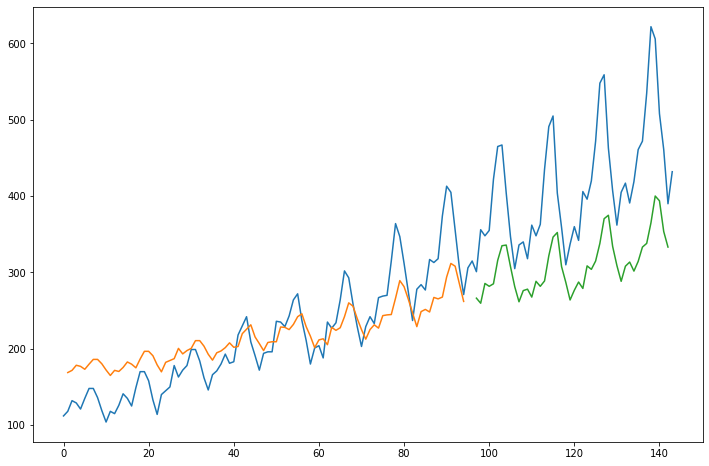

In [13]:
trainPredictPlot = np.empty_like(data_values)
trainPredictPlot[:,:] = np.nan
trainPredictPlot[loock_back: len(trainPredict)+loock_back, :] = trainPredict

testPredictPlot = np.empty_like(data_values)
testPredictPlot[:,:] = np.nan
testPredictPlot[len(trainPredict)+(loock_back*2)+1:len(data_values)-1,:] = testPredict

plt.figure(figsize=(12,8))
plt.plot(scaler.inverse_transform(data_values))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)